## GeoReferencing calibration of pictures in April, June and July of 2023

In [3]:
from hypso import Hypso1, Hypso2
import os 
import sys
import matplotlib.pyplot as plt
from global_land_mask import globe 
import numpy as np 

parent_dir = os.path.abspath('..')
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

import funcions_autonom as f
import atmosperic_correction as atm_c ## obs denne het før ac -> kan føre til feil dersom man ikke finner funkjsons navn
import base as ac

import xarray as xr
import re
import math
import importlib

from sklearn.cluster import KMeans
from collections import defaultdict

from sklearn.preprocessing import StandardScaler

np.random.seed(42)

dir_path = ".." ## filene hentes fra en mappe over der vi er nå

### Uploading data

In [4]:
frohavet_path_0407 = os.path.join(dir_path, "frohavet_2023-04-07T10-07-15Z-l1a.nc")
frohavet_path_0407_b = os.path.join(dir_path, "frohavet_2023-04-07T10-07-15Z-l1b.nc")
frohavet_path_0407_c = os.path.join(dir_path, "frohavet_2023-04-07T10-07-15Z-l1c.nc")
frohavet_path_0407_d = os.path.join(dir_path, "frohavet_2023-04-07T10-07-15Z-l1d.nc") 

satobj_h1_0407 = Hypso1( path = frohavet_path_0407, verbose = True )

l1a_cube_0407 = satobj_h1_0407.l1a_cube
l1b_cube_0407 = Hypso1( path = frohavet_path_0407_b, verbose = True )
l1c_cube_0407 = Hypso1( path = frohavet_path_0407_c, verbose = True )
l1d_cube_0407 = Hypso1( path = frohavet_path_0407_d, verbose = True )

l1c_cube_0407 = l1c_cube_0407.l1c_cube
l1b_cube_0407 = l1b_cube_0407.l1b_cube
l1d_cube_0407 = l1d_cube_0407.l1d_cube

satobj_h1_0407.run_direct_georeferencing() # in order to get the longiyudes and latitude07

[INFO] Loading L1a capture frohavet_2023-04-07T10-07-15Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2023-04-07T10-07-15Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2023-04-07T10-07-15Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2023-04-07T10-07-15Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1911
[INFO] ADCS time range: 1680861360.000000 to 1680862266.000000
[INFO] Frame time range: 1680862035.869211 to 1680862085.619211
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry comput

In [5]:
frohavet_path_0412 = os.path.join(dir_path, "frohavet_2023-04-12T10-27-31Z-l1a.nc")
frohavet_path_0412_b = os.path.join(dir_path, "frohavet_2023-04-12T10-27-31Z-l1b.nc")
frohavet_path_0412_c = os.path.join(dir_path, "frohavet_2023-04-12T10-27-31Z-l1c.nc")
frohavet_path_0412_d = os.path.join(dir_path, "frohavet_2023-04-12T10-27-31Z-l1d.nc") 

satobj_h1_0412 = Hypso1( path = frohavet_path_0412, verbose = True )

l1a_cube_0412 = satobj_h1_0412.l1a_cube
l1b_cube_0412 = Hypso1( path = frohavet_path_0412_b, verbose = True )
l1c_cube_0412 = Hypso1( path = frohavet_path_0412_c, verbose = True )
l1d_cube_0412 = Hypso1( path = frohavet_path_0412_d, verbose = True )

l1c_cube_0412 = l1c_cube_0412.l1c_cube
l1b_cube_0412 = l1b_cube_0412.l1b_cube
l1d_cube_0412 = l1d_cube_0412.l1d_cube

satobj_h1_0412.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture frohavet_2023-04-12T10-27-31Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2023-04-12T10-27-31Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2023-04-12T10-27-31Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2023-04-12T10-27-31Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1919
[INFO] ADCS time range: 1681294560.000000 to 1681295482.750000
[INFO] Frame time range: 1681295251.796884 to 1681295301.546884
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry comput

In [6]:
frohavet_path_0614 = os.path.join(dir_path, "frohavet_2023-06-14T10-03-05Z-l1a.nc")
frohavet_path_0614_b = os.path.join(dir_path, "frohavet_2023-06-14T10-03-05Z-l1b.nc")
frohavet_path_0614_c = os.path.join(dir_path, "frohavet_2023-06-14T10-03-05Z-l1c.nc")
frohavet_path_0614_d = os.path.join(dir_path, "frohavet_2023-06-14T10-03-05Z-l1d.nc") 

satobj_h1_0614 = Hypso1( path = frohavet_path_0614, verbose = True )

l1a_cube_0614 = satobj_h1_0614.l1a_cube
l1b_cube_0614 = Hypso1( path = frohavet_path_0614_b, verbose = True )
l1c_cube_0614 = Hypso1( path = frohavet_path_0614_c, verbose = True )
l1d_cube_0614 = Hypso1( path = frohavet_path_0614_d, verbose = True )

l1c_cube_0614 = l1c_cube_0614.l1c_cube
l1b_cube_0614 = l1b_cube_0614.l1b_cube
l1d_cube_0614 = l1d_cube_0614.l1d_cube

satobj_h1_0614.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture frohavet_2023-06-14T10-03-05Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2023-06-14T10-03-05Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2023-06-14T10-03-05Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2023-06-14T10-03-05Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1914
[INFO] ADCS time range: 1686736320.000000 to 1686737215.500000
[INFO] Frame time range: 1686736985.690326 to 1686737035.440326
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry comput

In [7]:
frohavet_path_0730 = os.path.join(dir_path, "frohavet_2023-07-30T10-17-47Z-l1a.nc")
frohavet_path_0730_b = os.path.join(dir_path, "frohavet_2023-07-30T10-17-47Z-l1b.nc")
frohavet_path_0730_c = os.path.join(dir_path, "frohavet_2023-07-30T10-17-47Z-l1c.nc")
frohavet_path_0730_d = os.path.join(dir_path, "frohavet_2023-07-30T10-17-47Z-l1d.nc") 

satobj_h1_0730 = Hypso1( path = frohavet_path_0730, verbose = True )

l1a_cube_0730 = satobj_h1_0730.l1a_cube
l1b_cube_0730 = Hypso1( path = frohavet_path_0730_b, verbose = True )
l1c_cube_0730 = Hypso1( path = frohavet_path_0730_c, verbose = True )
l1d_cube_0730 = Hypso1( path = frohavet_path_0730_d, verbose = True )

l1c_cube_0730 = l1c_cube_0730.l1c_cube
l1b_cube_0730 = l1b_cube_0730.l1b_cube
l1d_cube_0730 = l1d_cube_0730.l1d_cube

satobj_h1_0730.run_direct_georeferencing() # in order to get the longiyudes and latitudes 

[INFO] Loading L1a capture frohavet_2023-07-30T10-17-47Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1b capture frohavet_2023-07-30T10-17-47Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1c capture frohavet_2023-07-30T10-17-47Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Loading L1d capture frohavet_2023-07-30T10-17-47Z
[INFO] Capture spatial dimensions: (598, 1092)
[INFO] Capture capture type: wide
[INFO] Running direct georeferencing...
[INFO] ADCS samples: 1911
[INFO] ADCS time range: 1690711620.000000 to 1690712497.250000
[INFO] Frame time range: 1690712267.271759 to 1690712317.021759
[INFO] 199 sample(s) inside frame time range
[INFO] Interpolating 598 frames
[INFO] Computing pixel latitude and longitude coordinates ...
[INFO] Interpolating pixel coordinate gaps...
[INFO] Direct georeferencing done
[INFO] Running track geometry comput

### 07.04.23 Calibration

In [11]:
latitudes_0407 = satobj_h1_0407.latitudes
longitudes_0407 = satobj_h1_0407.longitudes

calibration_lat = [63.642540, 63.642540, 63.642540, 63.642540] ##
calibration_long = [9.503311, 9.503311, 9.503311, 9.503311]

piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, latitudes_0407, longitudes_0407) #from file funcions_autonom.py

print(piksel_col_A3, piksel_col_A3)

[np.int64(185), np.int64(185), np.int64(185), np.int64(185)] [np.int64(185), np.int64(185), np.int64(185), np.int64(185)]


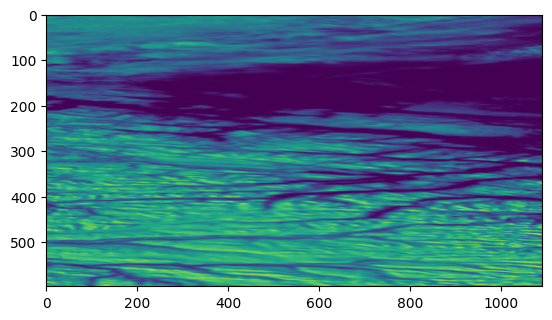

In [10]:
plt.imshow(l1d_cube_0407[:,:,100], origin='upper')

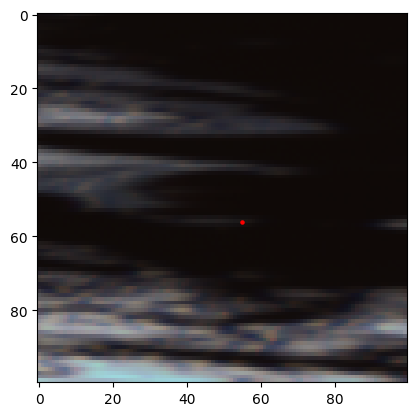

In [28]:
channel = 100
i_start, i_end = 150, 250
j_start, j_end = 200, 300

calibration_x = 70
calibration_y = 1
cropped = l1d_cube_0407[i_start:i_end, j_start:j_end, [50,70,90]]

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()

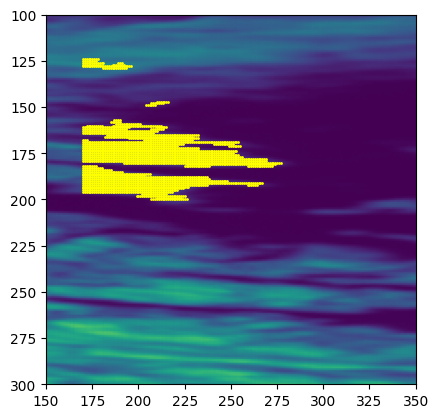

In [29]:
##plot from gpt

plt.imshow(l1d_cube_0407[:, :, 100], origin='upper')  # Make sure image and scatter match

for i in range(i_start -50 , i_end -50 ):
    for j in range(j_start -100 , j_end- 50):
        if globe.is_land(satobj_h1_0407.latitudes[i][j], satobj_h1_0407.longitudes[i][j]):
            plt.scatter(j + calibration_x, i + calibration_y, color='yellow', s=1)

# Crop to region x = 300–500 and y = 500–650
plt.xlim(j_start - 50, j_end + 50 )
plt.ylim(i_end + 50, i_start - 50)  # Y is inverted by default

plt.show()

### Calibration 12.04.2023

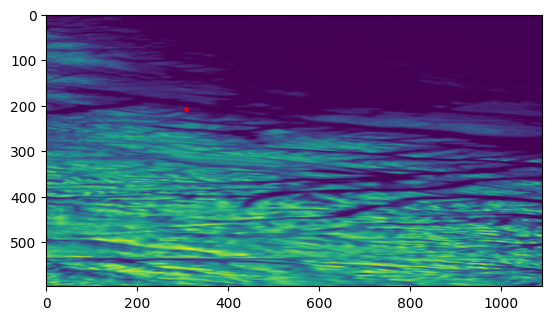

In [35]:
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_0412.latitudes, satobj_h1_0412.longitudes) #from file funcions_autonom.py

plt.imshow(l1d_cube_0412[:,:, 100], origin='upper')
plt.scatter(piksel_col_A3[0], piksel_row_A3[0], color='red', s=5)

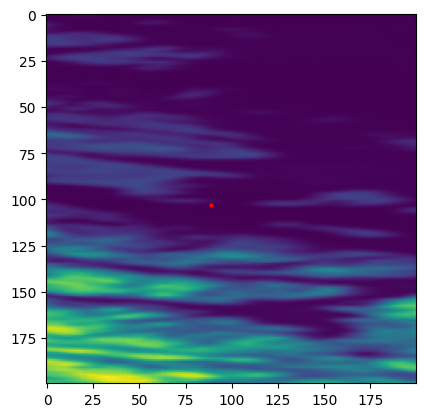

In [53]:
i_start, i_end = 100, 300
j_start, j_end = 300, 500

calibration_x = 81
calibration_y = - 4
cropped = l1d_cube_0412[i_start:i_end, j_start:j_end, 100]
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_0412.latitudes, satobj_h1_0412.longitudes) #from file funcions_autonom.py

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()

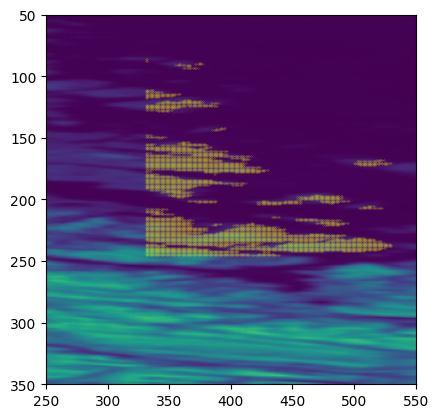

In [54]:
plt.imshow(l1d_cube_0412[:, :, 100], origin='upper')  # Make sure image and scatter match

for i in range(i_start -50 , i_end -50 ):
    for j in range(j_start - 50 , j_end- 50):
        if globe.is_land(satobj_h1_0412.latitudes[i][j], satobj_h1_0412.longitudes[i][j]):
            plt.scatter(j + calibration_x, i + calibration_y, color='yellow', s=0.01)

# Crop to region x = 300–500 and y = 500–650
plt.xlim(j_start - 50, j_end + 50 )
plt.ylim(i_end + 50, i_start - 50)  # Y is inverted by default

plt.show()

### Calibration 14.06.23 

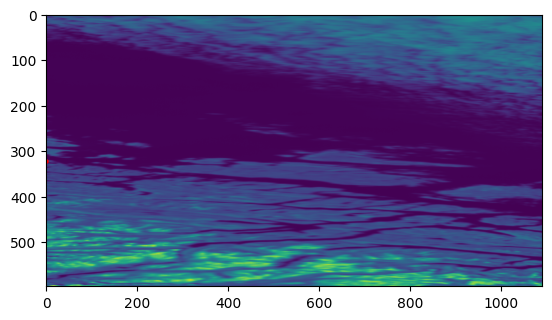

In [63]:
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_0614.latitudes, satobj_h1_0614.longitudes)

plt.imshow(l1d_cube_0614[:,:, 100], origin='upper')
plt.scatter(piksel_col_A3[0], piksel_row_A3[0], color='red', s=5)
plt.show()

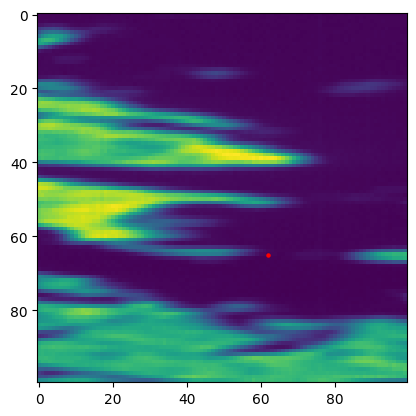

In [70]:
i_start, i_end = 250, 350
j_start, j_end = 0, 100

calibration_x =62
calibration_y = -7
cropped = l1d_cube_0614[i_start:i_end, j_start:j_end, 100]
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_0614.latitudes, satobj_h1_0614.longitudes) #from file funcions_autonom.py

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()

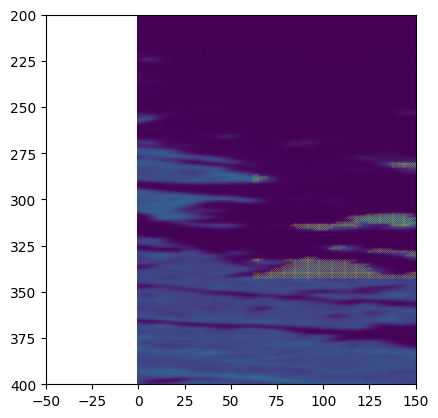

In [85]:
plt.imshow(l1d_cube_0614[:, :, 100], origin='upper')  # Make sure image and scatter match

for i in range(i_start , i_end  ):
    for j in range(j_start , j_end):
        if globe.is_land(satobj_h1_0614.latitudes[i][j], satobj_h1_0614.longitudes[i][j]):
            plt.scatter(j + calibration_x, i + calibration_y, color='yellow', s=0.01)

# Crop to region x = 300–500 and y = 500–650
plt.xlim(j_start - 50, j_end + 50 )
plt.ylim(i_end + 50, i_start - 50)  # Y is inverted by default

plt.show()

### Calibration 0730

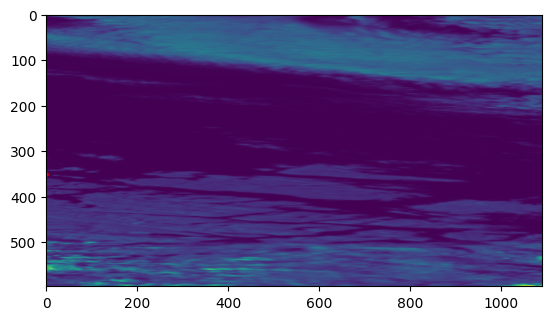

In [89]:
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat, calibration_long, satobj_h1_0730.latitudes, satobj_h1_0730.longitudes) #from file funcions_autonom.py

plt.imshow(l1d_cube_0730[:,:, 100], origin='upper')
plt.scatter(piksel_col_A3[0], piksel_row_A3[0], color='red', s=5)

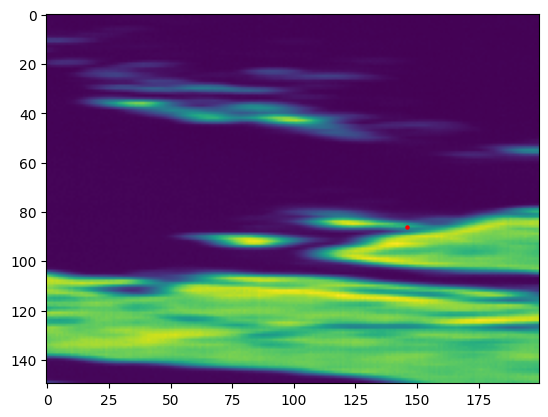

In [106]:
i_start, i_end = 250, 400
j_start, j_end = 400, 600

calibration_lat_froya = [63.765797, 63.765797, 63.765797, 63.765797] ##
calibration_long_froya = [8.830811, 8.830811, 8.830811, 8.830811]

calibration_x = 43
calibration_y = -7
cropped = l1d_cube_0730[i_start:i_end, j_start:j_end, 100]
piksel_row_A3, piksel_col_A3 = f.latLong_to_piksel(calibration_lat_froya, calibration_long_froya, satobj_h1_0730.latitudes, satobj_h1_0730.longitudes) #from file funcions_autonom.py

plt.imshow(cropped, origin='upper')
plt.scatter(piksel_col_A3[0] - j_start + calibration_x, piksel_row_A3[0] - i_start + calibration_y, color='red', s=5)


plt.show()

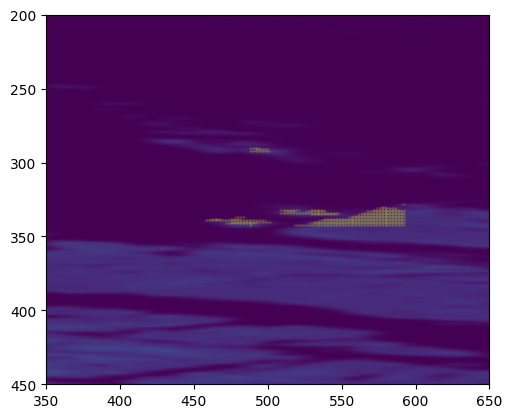

In [107]:
plt.imshow(l1d_cube_0730[:, :, 100], origin='upper')  # Make sure image and scatter match

for i in range(i_start -50 , i_end -50 ):
    for j in range(j_start - 50 , j_end- 50):
        if globe.is_land(satobj_h1_0730.latitudes[i][j], satobj_h1_0730.longitudes[i][j]):
            plt.scatter(j + calibration_x, i + calibration_y, color='yellow', s=0.01)

# Crop to region x = 300–500 and y = 500–650
plt.xlim(j_start - 50, j_end + 50 )
plt.ylim(i_end + 50, i_start - 50)  # Y is inverted by default

plt.show()